# 量化交易策略演示

本笔记本演示了几种常见的量化交易策略，包括：
- 移动平均线交叉策略
- RSI策略
- 布林带策略
- MACD策略
- 买入持有策略（基准）

我们将使用`backtrader`框架进行回测和可视化。


## 1. 环境准备

首先，我们导入必要的库。


In [1]:
%matplotlib inline
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 添加项目根目录到系统路径
sys.path.append(os.path.dirname((os.getcwd())))

# 导入策略类
from quantics.strategy import (
    MovingAverageCrossStrategy,
    RSIStrategy,
    BollingerBandsStrategy,
    MACDStrategy,
    BuyHoldStrategy,
    DataLoader,
    BacktestUtils
)

## 2. 数据加载

我们使用`DataLoader`类加载股票数据。这里以`002745.SZ`（木林森）为例。


In [2]:
# 初始化数据加载器
data_loader = DataLoader()

# 设置回测参数
ticker_symbol = '002745.SZ'  # 木林森
start_date = '2022-03-02'
end_date = '2025-03-02'

# 加载股票数据
print(f"正在加载 {ticker_symbol} 从 {start_date} 到 {end_date} 的数据...")
stock_data = data_loader.load_stock_data(ticker_symbol, start_date, end_date)

stock_data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        


正在加载 002745.SZ 从 2022-03-02 到 2025-03-02 的数据...
从本地缓存加载数据: data_cache\002745.SZ_20220302_20250302_data.csv
数据格式修复完成

数据验证:
索引类型: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
索引前5个值: DatetimeIndex(['2022-03-03', '2022-03-04', '2022-03-07', '2022-03-08',
               '2022-03-09'],
              dtype='datetime64[ns]', name='2022-03-02', freq=None)
数值列是否都是数值类型: ['Open', 'High', 'Low', 'Close', 'Volume']
Volume列是否都是整数: int64

修复后的数据类型:
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
获取到002745.SZ从2022-03-02到2025-03-02的数据，共725个交易日
数据列名: ['Open', 'High', 'Low', 'Close', 'Volume']
数据类型:
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

前5行数据:
                 Open       High        Low      Close    Volume
2022-03-02                                                      
2022-03-03  11.670238  11.688096  11.473800  11.536303  13641955
2022-03-04  11.438084  11.527373  11.34

## 3. 数据可视化

让我们先看一下股票的价格走势。


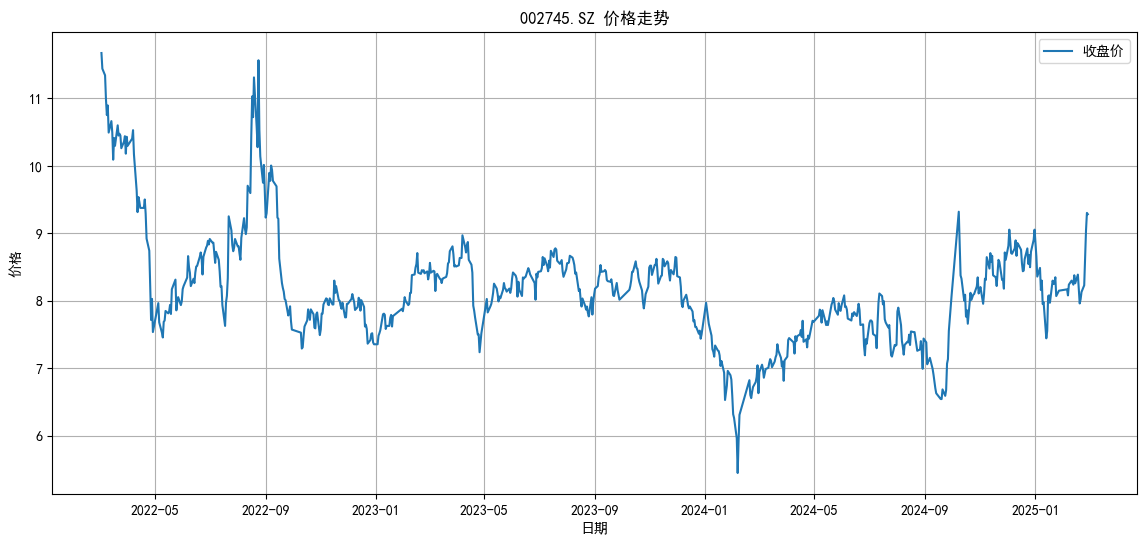

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # For Windows
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(14, 6))
plt.plot(stock_data.index, stock_data['Close'], label='收盘价')
plt.title(f'{ticker_symbol} 价格走势')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.grid(True)
plt.show()

## 4. 回测工具初始化

我们使用`BacktestUtils`类来运行回测和分析结果。


In [4]:
# 初始化回测工具
initial_cash = 100000.0  # 初始资金10万元
commission = 0.001  # 交易佣金0.1%
backtest_utils = BacktestUtils(initial_cash=initial_cash, commission=commission)

# 创建回测数据源
data_feed = data_loader.create_bt_data_feed(stock_data)

## 5. 移动平均线交叉策略

当短期均线上穿长期均线时买入，下穿时卖出。


In [5]:
# 运行移动平均线策略回测
print("运行移动平均线策略回测...")
cerebro_ma, strategy_ma, results_ma = backtest_utils.run_backtest(
    MovingAverageCrossStrategy,
    data_feed,
    fast_period=20,  # 短期均线周期
    slow_period=50,  # 长期均线周期
    printlog=False
)


# 绘制回测结果
%matplotlib inline 
backtest_utils.plot_results(cerebro_ma, style='candlestick', title='移动平均线策略回测结果')

运行移动平均线策略回测...
初始资金: $100000.00
最终资金: $73803.07
盈亏: $-26196.93 (-26.20%)

--- 性能指标 ---
夏普比率: -0.4022
最大回撤: 51.48%
年化收益率: -10.02%
总交易次数: 7
胜率: 28.6% (2/7)
总净盈亏: -26196.93
平均每笔交易盈亏: -3742.42
平均盈利: 2633.59
平均亏损: -6292.82
盈亏比 (Profit Factor): 0.17


<IPython.core.display.Javascript object>

## 6. RSI策略

当RSI低于30时买入，高于70时卖出。


In [6]:
# 运行RSI策略回测
print("运行RSI策略回测...")
cerebro_rsi, strategy_rsi, results_rsi = backtest_utils.run_backtest(
    RSIStrategy,
    data_feed,
    rsi_period=14,  # RSI计算周期
    rsi_low=30,     # RSI超卖阈值
    rsi_high=70,    # RSI超买阈值
    printlog=True
)

# 绘制回测结果
backtest_utils.plot_results(cerebro_rsi, style='line', title='RSI策略回测结果')

运行RSI策略回测...
初始资金: $100000.00
2022-03-23, 收盘价: 10.47, RSI: 30.86
当前资金: 100000.00
2022-03-24, 收盘价: 10.45, RSI: 33.03
当前资金: 100000.00
2022-03-25, 收盘价: 10.26, RSI: 32.05
当前资金: 100000.00
2022-03-28, 收盘价: 10.36, RSI: 38.64
当前资金: 100000.00
2022-03-29, 收盘价: 10.44, RSI: 43.99
当前资金: 100000.00
2022-03-30, 收盘价: 10.18, RSI: 36.84
当前资金: 100000.00
2022-03-31, 收盘价: 10.43, RSI: 48.78
当前资金: 100000.00
2022-04-01, 收盘价: 10.30, RSI: 42.76
当前资金: 100000.00
2022-04-06, 收盘价: 10.40, RSI: 48.19
当前资金: 100000.00
2022-04-07, 收盘价: 10.53, RSI: 60.00
当前资金: 100000.00
2022-04-08, 收盘价: 10.17, RSI: 44.58
当前资金: 100000.00
2022-04-11, 收盘价: 9.63, RSI: 37.50
当前资金: 100000.00
2022-04-12, 收盘价: 9.31, RSI: 25.84
当前资金: 100000.00
2022-04-12, 买入信号 (RSI<30), 全仓买入: 10630 股
当前资金: 100000.00
2022-04-13, 订单保证金不足
当前资金: 100000.00
2022-04-13, 可用资金: 100000.00
当前资金: 100000.00
2022-04-13, 收盘价: 9.54, RSI: 33.33
当前资金: 100000.00
2022-04-14, 收盘价: 9.46, RSI: 31.83
当前资金: 100000.00
2022-04-15, 收盘价: 9.38, RSI: 31.13
当前资金: 100000.00
2022-04-18, 收盘价: 9.38,

<IPython.core.display.Javascript object>

## 7. 策略比较

让我们比较不同策略的表现。


In [7]:
# 定义要比较的策略
strategy_configs = [
    ('MA Cross', MovingAverageCrossStrategy, dict(fast_period=20, slow_period=50, printlog=False)),
    ('RSI', RSIStrategy, dict(rsi_period=14, rsi_low=30, rsi_high=70, printlog=False)),
    ('Bollinger Bands', BollingerBandsStrategy, dict(period=20, devfactor=2.0, printlog=False)),
    ('MACD', MACDStrategy, dict(fastperiod=12, slowperiod=26, signalperiod=9, printlog=False)),
    ('Buy & Hold', BuyHoldStrategy, dict(printlog=False)),
]

# 比较策略
print("正在比较不同策略...")
performance_df = backtest_utils.compare_strategies(strategy_configs, data_feed)

# 显示策略比较结果
performance_df

正在比较不同策略...
正在测试策略: MA Cross
正在测试策略: RSI
正在测试策略: Bollinger Bands
正在测试策略: MACD
正在测试策略: Buy & Hold
策略绩效对比：
                 sharpe_ratio  max_drawdown  annual_return    final_value  \
Bollinger Bands      3.402507     25.144119      27.215230  199874.481379   
RSI                  0.354444     31.416442       5.439648  116461.395766   
MACD                 0.031941     29.597244       1.019951  102962.554422   
Buy & Hold          -0.187697     51.191859      -6.669528   81989.451314   
MA Cross            -0.467342     51.477799     -10.020312   73803.065789   

                 total_return  \
Bollinger Bands     99.874481   
RSI                 16.461396   
MACD                 2.962554   
Buy & Hold         -18.010549   
MA Cross           -26.196934   

                                                      equity_curve  
Bollinger Bands  2022-03-03    100000.000000
2022-03-04    1000...  
RSI              2022-03-03    100000.000000
2022-03-04    1000...  
MACD             2022-03-0

,sharpe_ratio,max_drawdown,annual_return,final_value,total_return,equity_curve
Bollinger Bands,3.402507,25.144119,27.215230,199874.481379,99.874481,2022-03-03 100000.000000 2022-03-04 1000...
RSI,0.354444,31.416442,5.439648,116461.395766,16.461396,2022-03-03 100000.000000 2022-03-04 1000...
MACD,0.031941,29.597244,1.019951,102962.554422,2.962554,2022-03-03 100000.000000 2022-03-04 1000...
Buy & Hold,-0.187697,51.191859,-6.669528,81989.451314,-18.010549,2022-03-03 100000.000000 2022-03-04 1002...
MA Cross,-0.467342,51.477799,-10.020312,73803.065789,-26.196934,2022-03-03 100000.000000 2022-03-04 1000...


## 8. 策略表现可视化

让我们用图表更直观地比较各策略的表现。


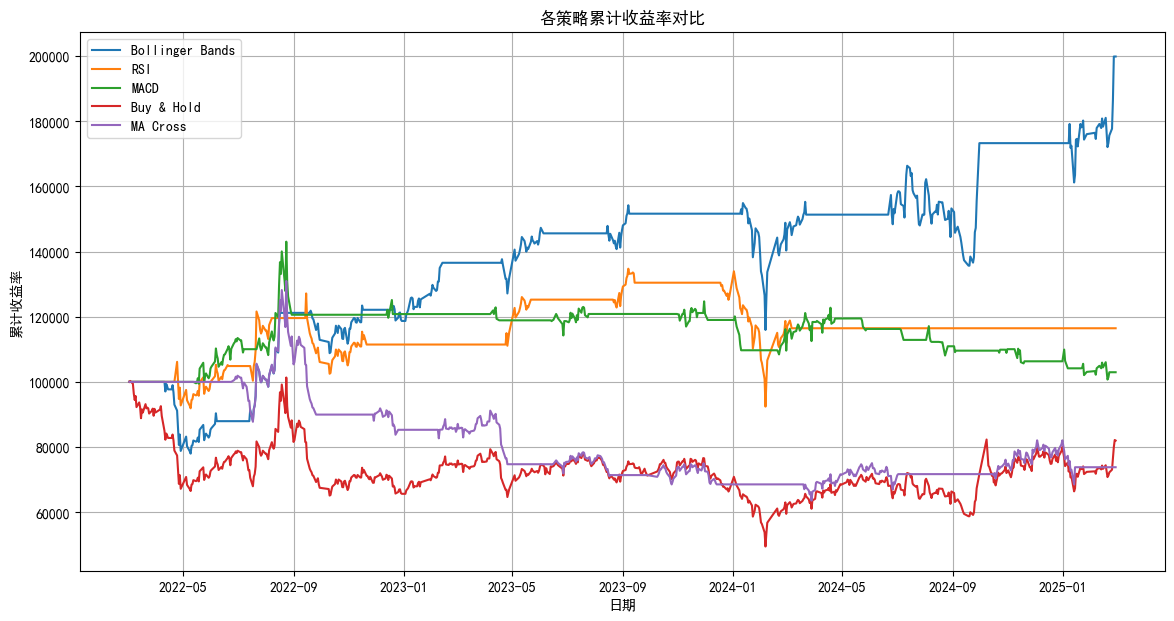

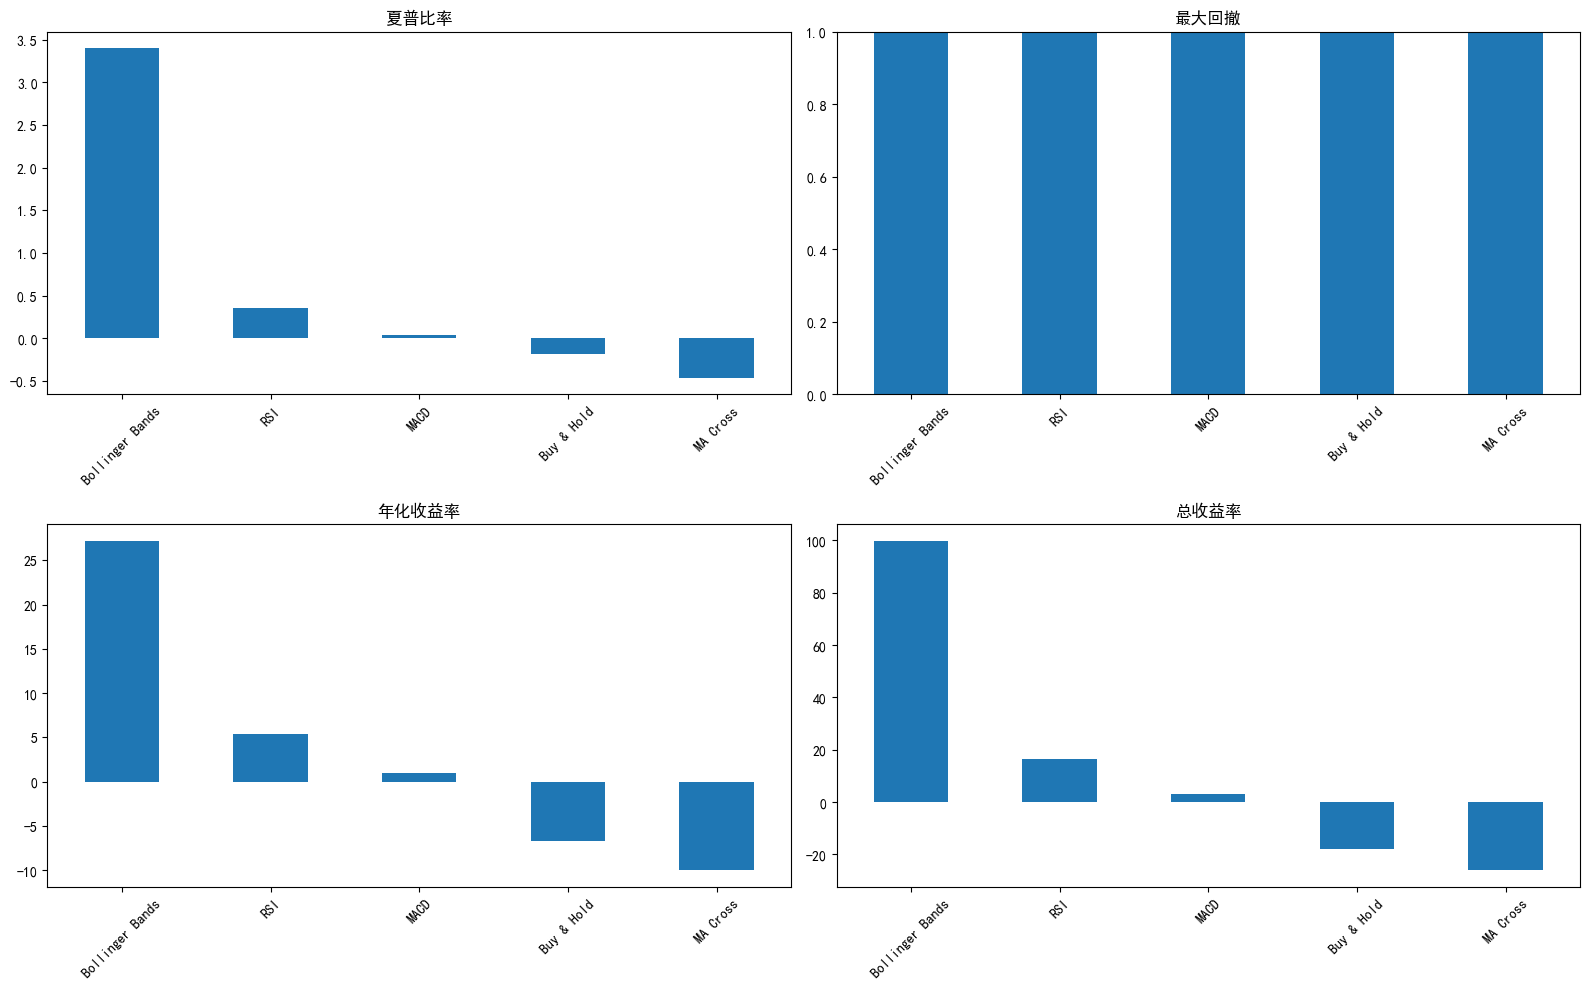

In [8]:

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

%matplotlib inline

# 绘制各策略的累计收益率
plt.figure(figsize=(14, 7))
for strategy_name in performance_df.index:
    plt.plot(performance_df.loc[strategy_name, 'equity_curve'], label=strategy_name)

plt.title('各策略累计收益率对比')
plt.xlabel('日期')
plt.ylabel('累计收益率')
plt.legend()
plt.grid(True)
plt.show()
metrics = ['sharpe_ratio', 'max_drawdown', 'annual_return', 'total_return']
metric_names = ['夏普比率', '最大回撤', '年化收益率', '总收益率']

plt.figure(figsize=(16, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    performance_df[metric].plot(kind='bar')
    plt.title(metric_names[i-1])
    if metric == 'max_drawdown':
        plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

## 9. 参数优化

让我们以移动平均线策略为例，展示如何通过网格搜索来寻找最佳参数组合。


In [9]:
# 参数优化
param_ranges = {
    'fast_period': [5, 10, 20, 30],
    'slow_period': [30, 50, 100, 200]
}

print("开始参数优化...")
optimization_results = backtest_utils.optimize_parameters(
    MovingAverageCrossStrategy,
    data_feed,
    param_ranges,              # 参数范围字典
    metric='sharpe_ratio',     # 使用夏普比率作为优化指标
)

# 显示优化结果
print("参数优化结果（按夏普比率降序排列）：")
print(optimization_results.head(10))

开始参数优化...
开始参数优化，总共16个参数组合...
2022-06-06, 买入信号 (fast_ma>slow_ma), 计划买入: 11386 股
当前资金: 100000.00
2022-06-07, 买单执行, 价格: 8.48, 股数: 11386
当前资金: 101968.65
2022-07-13, 卖出信号 (fast_ma<slow_ma), 卖出全部: 11386 股
当前资金: 96805.66
2022-07-14, 卖单执行, 价格: 8.30, 股数: -11386
当前资金: 97743.76
2022-07-26, 买入信号 (fast_ma>slow_ma), 计划买入: 10523 股
当前资金: 97743.76
2022-07-27, 买单执行, 价格: 8.78, 股数: 10523
当前资金: 97174.22
2022-09-02, 卖出信号 (fast_ma<slow_ma), 卖出全部: 10523 股
当前资金: 103091.09
2022-09-05, 卖单执行, 价格: 9.81, 股数: -10523
当前资金: 108427.53
2022-09-08, 买入信号 (fast_ma>slow_ma), 计划买入: 10363 股
当前资金: 108427.53
2022-09-09, 买单执行, 价格: 9.66, 股数: 10363
当前资金: 109549.20
2022-09-14, 卖出信号 (fast_ma<slow_ma), 卖出全部: 10363 股
当前资金: 103910.28
2022-09-15, 卖单执行, 价格: 8.62, 股数: -10363
当前资金: 97430.19
2022-11-07, 买入信号 (fast_ma>slow_ma), 计划买入: 11519 股
当前资金: 97430.19
2022-11-08, 买单执行, 价格: 7.95, 股数: 11519
当前资金: 98174.30
2022-11-29, 卖出信号 (fast_ma<slow_ma), 卖出全部: 11519 股
当前资金: 95040.31
2022-11-30, 卖单执行, 价格: 7.88, 股数: -11519
当前资金: 96412.05
2022-12-05, 买入信

### 参数优化结果分析

让我们可视化参数优化的结果，看看哪些参数组合表现最好。


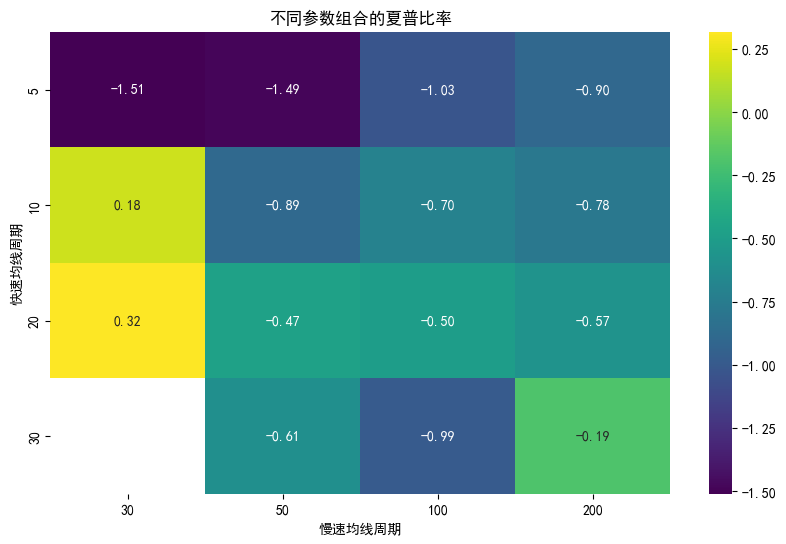

最佳参数组合:
快速均线周期: 20
慢速均线周期: 30
夏普比率: 0.32
总收益率: 1433.76%
最大回撤: 2183.43%
使用最佳参数运行回测...
初始资金: $100000.00
最终资金: $114337.65
盈亏: $14337.65 (14.34%)

--- 性能指标 ---
夏普比率: 0.4322
最大回撤: 21.83%
年化收益率: 4.77%
总交易次数: 12
胜率: 58.3% (7/12)
总净盈亏: 490.80
平均每笔交易盈亏: 40.90
平均盈利: 3258.50
平均亏损: -4463.74
盈亏比 (Profit Factor): 1.02

最佳参数回测结果:
期末资产: 114337.65 元
总收益率: 14.34%
年化收益率: 4.77%
最大回撤: 21.83%
夏普比率: 0.43


<IPython.core.display.Javascript object>

In [12]:
optimization_df = optimization_results
# 创建热力图展示参数优化结果
pivot_table = optimization_df.pivot(
    index='fast_period',
    columns='slow_period',
    values='sharpe_ratio'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis')
plt.title('不同参数组合的夏普比率')
plt.xlabel('慢速均线周期')
plt.ylabel('快速均线周期')
plt.show()

# 找出最佳参数
best_params = optimization_df.iloc[0]
print(f"最佳参数组合:")
print(f"快速均线周期: {int(best_params['fast_period'])}")
print(f"慢速均线周期: {int(best_params['slow_period'])}")
print(f"夏普比率: {best_params['sharpe_ratio']:.2f}")
print(f"总收益率: {best_params['total_return']*100:.2f}%")
print(f"最大回撤: {best_params['max_drawdown']*100:.2f}%")

# 使用最佳参数运行回测
print("使用最佳参数运行回测...")
cerebro_best, strategy_best, results_best = backtest_utils.run_backtest(
    MovingAverageCrossStrategy,
    data_feed,
    fast_period=int(best_params['fast_period']),
    slow_period=int(best_params['slow_period']),
    printlog=False
)

# 显示回测结果
print("\n最佳参数回测结果:")
# 从cerebro获取期末资产
final_value = cerebro_best.broker.getvalue()
print(f"期末资产: {final_value:.2f} 元")

# 从strategy获取各种指标
strategy = results_best[0]
sharpe_ratio = strategy.analyzers.sharpe.get_analysis().get('sharperatio', None)
max_drawdown = strategy.analyzers.drawdown.get_analysis().get('max', {}).get('drawdown', None)
annual_return = strategy.analyzers.returns.get_analysis().get('rnorm100', None)
total_return = (final_value / backtest_utils.initial_cash - 1) * 100

print(f"总收益率: {total_return:.2f}%")
print(f"年化收益率: {annual_return:.2f}%" if annual_return is not None else "年化收益率: N/A")
print(f"最大回撤: {max_drawdown:.2f}%" if max_drawdown is not None else "最大回撤: N/A")
print(f"夏普比率: {sharpe_ratio:.2f}" if sharpe_ratio is not None else "夏普比率: N/A")
# 绘制回测结果
backtest_utils.plot_results(cerebro_best, style='candlestick', 
                          title=f'最佳参数回测结果 (快线={int(best_params["fast_period"])}, 慢线={int(best_params["slow_period"])}')

## 10. 结论

通过回测，我们可以得出以下观察：

1. 不同策略在不同市场环境下表现各异
2. 单一策略很难在所有市场条件下都表现优异
3. 组合策略可能会提供更稳定的收益

建议：
- 根据市场环境动态调整策略
- 考虑多策略组合
- 定期重新评估和优化策略参数
- 注意过拟合风险

## 后续步骤

1. 尝试不同的参数组合
2. 添加更多技术指标和策略
3. 实现更复杂的风险管理和头寸规模控制
4. 在更多股票和更长时间周期上测试策略
